In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
heart_disease = pd.read_csv('heart_disease_cleveland_con.csv')

In [4]:
heart_disease.shape

(303, 6)

In [5]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [6]:
heart_disease.iloc[:, 0:5] = normalize(heart_disease.iloc[:, 0:5],
                                      norm='l2')

In [7]:
heart_disease.head()

,age,trestbps,chol,thalach,oldpeak,label
0,0.197466,0.454485,0.730310,0.470156,0.007209,0
1,0.190612,0.455194,0.813659,0.307256,0.004267,1
2,0.225885,0.404571,0.772056,0.434914,0.008766,1
3,0.108753,0.382105,0.734817,0.549643,0.010287,0
4,0.136832,0.433857,0.680821,0.574026,0.004672,0


In [8]:
X = heart_disease.drop(['label'], axis=1)
Y = heart_disease['label']

In [9]:
X.head()

,age,trestbps,chol,thalach,oldpeak
0,0.197466,0.454485,0.730310,0.470156,0.007209
1,0.190612,0.455194,0.813659,0.307256,0.004267
2,0.225885,0.404571,0.772056,0.434914,0.008766
3,0.108753,0.382105,0.734817,0.549643,0.010287
4,0.136832,0.433857,0.680821,0.574026,0.004672


### K-means

In [10]:
k_range = range(1,11)

In [11]:
k_means_models = [KMeans(n_clusters = k, random_state = 1).fit(X)
                  for k in k_range]

In [12]:
len(k_means_models)

10

In [13]:
centroids = [one_model.cluster_centers_ for one_model in k_means_models]

In [14]:
len(centroids)

10

In [15]:
centroids[9]

array([[0.20114309, 0.49532738, 0.73966886, 0.40449077, 0.00500002],
       [0.14513063, 0.40654916, 0.69619823, 0.57111746, 0.00185317],
       [0.16887652, 0.39738526, 0.78818579, 0.43674948, 0.0033467 ],
       [0.2044262 , 0.49426452, 0.65707707, 0.52744118, 0.00504958],
       [0.14673095, 0.3240805 , 0.86726027, 0.34301744, 0.00500841],
       [0.1456886 , 0.3358119 , 0.82547035, 0.42715431, 0.00125321],
       [0.16415751, 0.36660916, 0.75943794, 0.50984729, 0.00190269],
       [0.16604348, 0.47112824, 0.57848933, 0.6393137 , 0.00191133],
       [0.18082474, 0.44381119, 0.73117638, 0.48356983, 0.00385012],
       [0.18011336, 0.41777061, 0.82745913, 0.32435317, 0.00444403]])

In [16]:
k_euclid = [cdist(X, cent, 'euclidean') for cent in centroids]

In [17]:
len(k_euclid[1])

303

In [18]:
k_euclid[9]

array([[0.07801354, 0.12814899, 0.09251086, ..., 0.23012176, 0.02414115,
        0.17987015],
       [0.12903993, 0.29641309, 0.14571416, ..., 0.40795869, 0.19523202,
        0.04464888],
       [0.10410378, 0.17572401, 0.05995457, ..., 0.2954749 , 0.08736706,
        0.13259383],
       ...,
       [0.2138261 , 0.24017205, 0.29615259, ..., 0.18839238, 0.21492764,
        0.35510029],
       [0.16436158, 0.05582532, 0.11660267, ..., 0.19402521, 0.06821335,
        0.23454875],
       [0.24823326, 0.11929545, 0.26117083, ..., 0.05968278, 0.18138825,
        0.36362429]])

In [19]:
dist = [ np.min(ke, axis=1) for ke in k_euclid ]

In [20]:
dist[9]

array([0.02414115, 0.04464888, 0.05995457, 0.06280569, 0.03267155,
       0.05116413, 0.031896  , 0.06322197, 0.02932472, 0.04433083,
       0.0191834 , 0.03222091, 0.00447445, 0.03999195, 0.07123231,
       0.06786068, 0.04095237, 0.02191678, 0.04680504, 0.03040859,
       0.06646046, 0.02218708, 0.03874639, 0.04831538, 0.03913621,
       0.04780841, 0.0421228 , 0.03356887, 0.05799048, 0.03364017,
       0.03901522, 0.03655159, 0.03960338, 0.02969279, 0.03138953,
       0.03702749, 0.04442944, 0.03127864, 0.02085447, 0.0407806 ,
       0.03098276, 0.07098729, 0.02912316, 0.03837651, 0.0128245 ,
       0.03744341, 0.03712341, 0.05577234, 0.03494967, 0.05452561,
       0.04222865, 0.05941277, 0.027598  , 0.02173583, 0.01975774,
       0.03620296, 0.03615012, 0.05398014, 0.03605108, 0.04704504,
       0.04487523, 0.0653052 , 0.03986214, 0.03779737, 0.04687393,
       0.03881536, 0.02002345, 0.03720367, 0.04408329, 0.05093958,
       0.05412723, 0.04323166, 0.04627065, 0.05029928, 0.05109

In [21]:
wcss = [ sum(d**2) for d in dist ]

In [22]:
len(wcss)

10

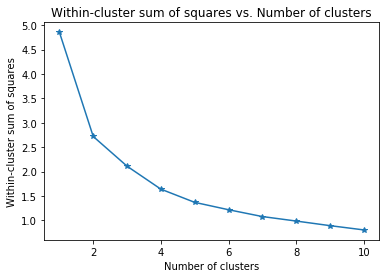

In [23]:
plt.plot( [ i+1 for i in range(0, len(wcss) ) ], wcss, marker="*" )
plt.title( 'Within-cluster sum of squares vs. Number of clusters' )
plt.xlabel( 'Number of clusters' )
plt.ylabel( 'Within-cluster sum of squares' )
plt.show()

#### elbow? 5정도?

In [24]:
k_means_2 = KMeans(n_clusters=2, random_state = 1).fit(X)

In [25]:
k_means_3 = KMeans(n_clusters=3, random_state = 1).fit(X)

In [26]:
k_means_4 = KMeans(n_clusters=4, random_state = 1).fit(X)

#### Evaluation (Supervised, classification-oriented)

In [27]:
metrics.adjusted_rand_score(Y, k_means_2.labels_) #supervised evaluation

0.04007320887224546

In [29]:
metrics.recall_score(Y, k_means_2.labels_)

0.39568345323741005

In [30]:
metrics.f1_score(Y, k_means_2.labels_)

0.3754266211604095

#### Evaluation (Supervised, similarity-oriented)

In [31]:
metrics.adjusted_rand_score(Y, k_means_2.labels_)

0.04007320887224546

In [32]:
metrics.adjusted_rand_score(Y, k_means_3.labels_)

0.024051250042604347

#### Evaluation (Unsupervised, silhouette)

In [28]:
metrics.silhouette_score(X, k_means_2.labels_, 
                         metric = "euclidean")

0.365181516848964

In [43]:
metrics.silhouette_score(X, k_means_3.labels_, 
                         metric = "euclidean")

0.28431176856715484

In [33]:
metrics.silhouette_score(X, k_means_4.labels_, 
                         metric = "euclidean")

0.31031592631738264

In [34]:
metrics.davies_bouldin_score(X, k_means_2.labels_)

1.0207669978293543

### Hierarchical Clustering

In [36]:
h_clustering_2 = AgglomerativeClustering(n_clusters = 2,
                                        affinity = 'euclidean',
                                        linkage = 'complete').fit(X)

In [37]:
h_clustering_2.labels_

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [38]:
metrics.f1_score(Y, h_clustering_2.labels_)

0.5925925925925926

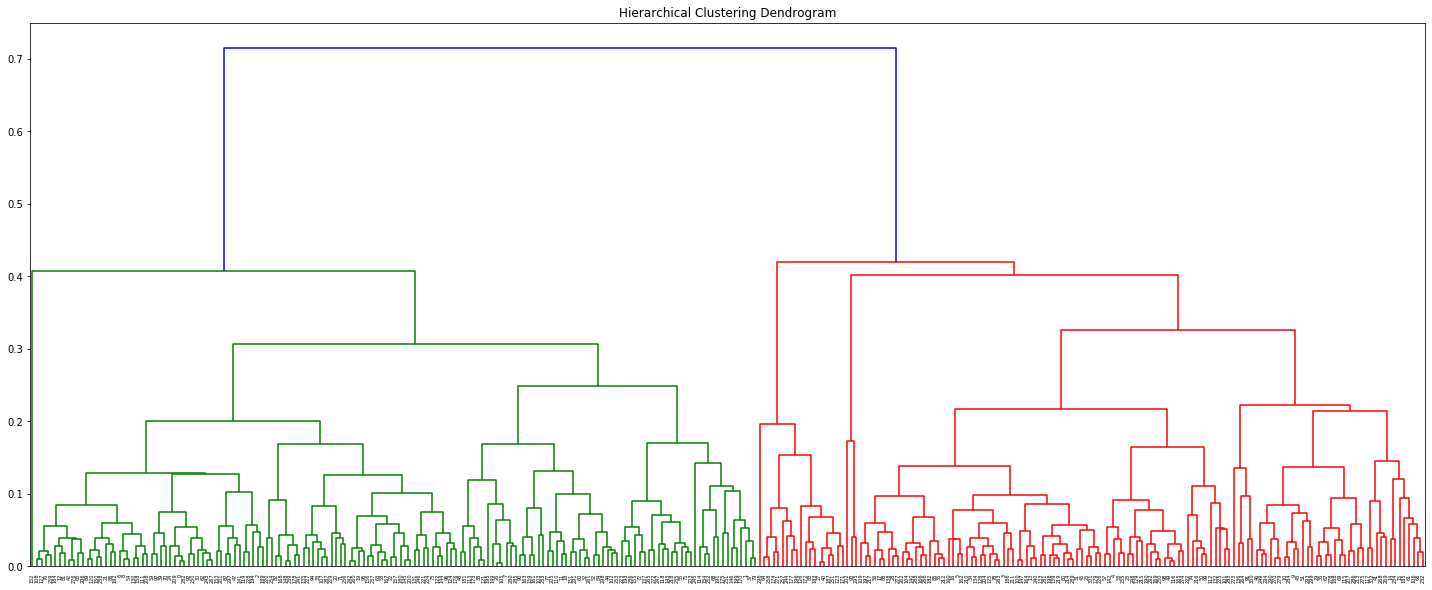

In [42]:
plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'complete'))
plt.show()

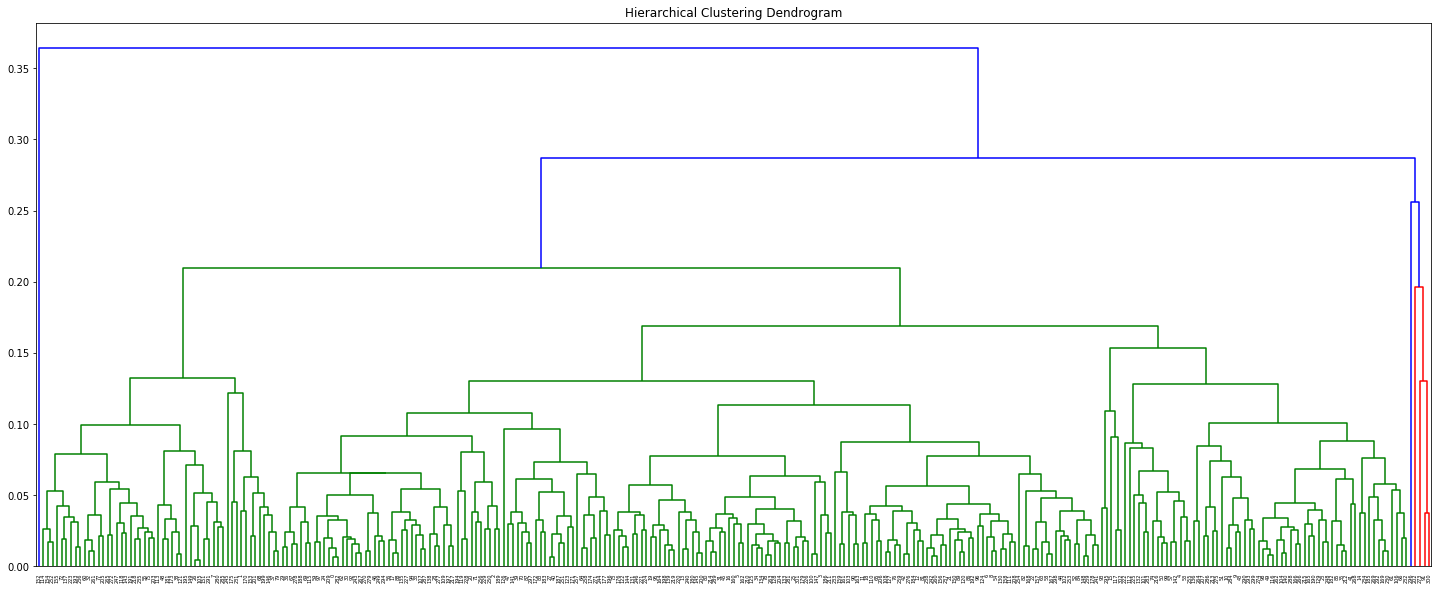

In [43]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'average'))
plt.show()

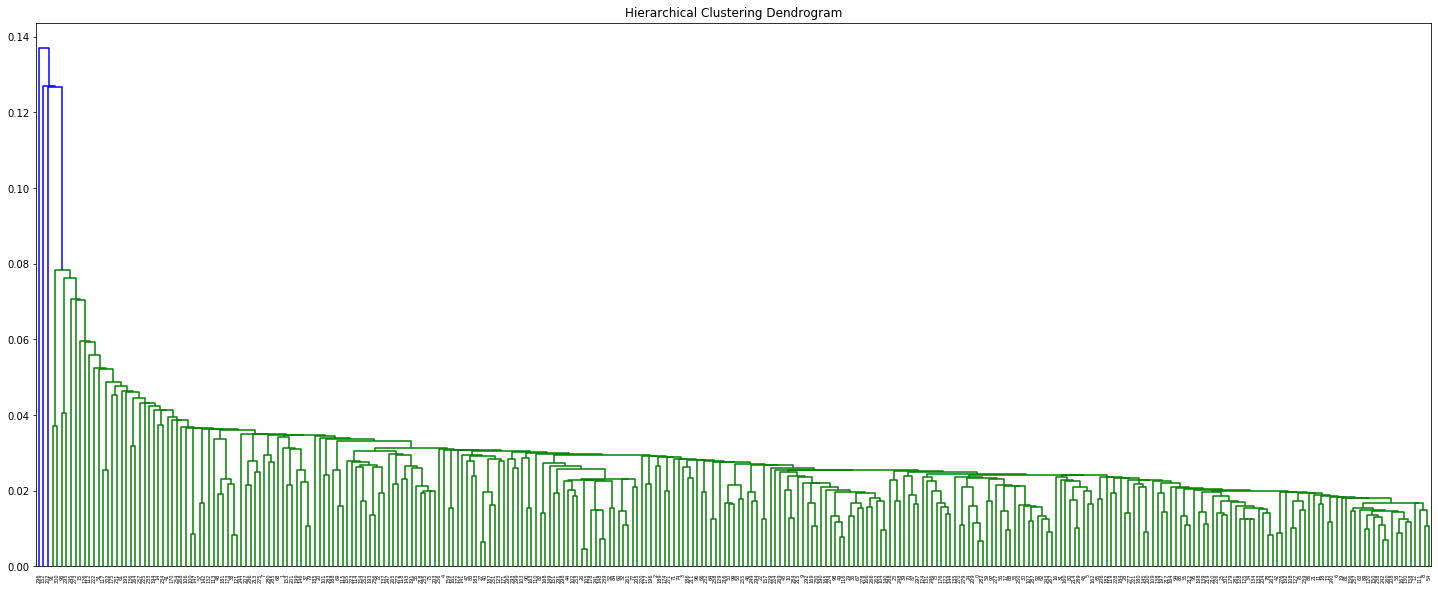

In [44]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'single'))
plt.show()

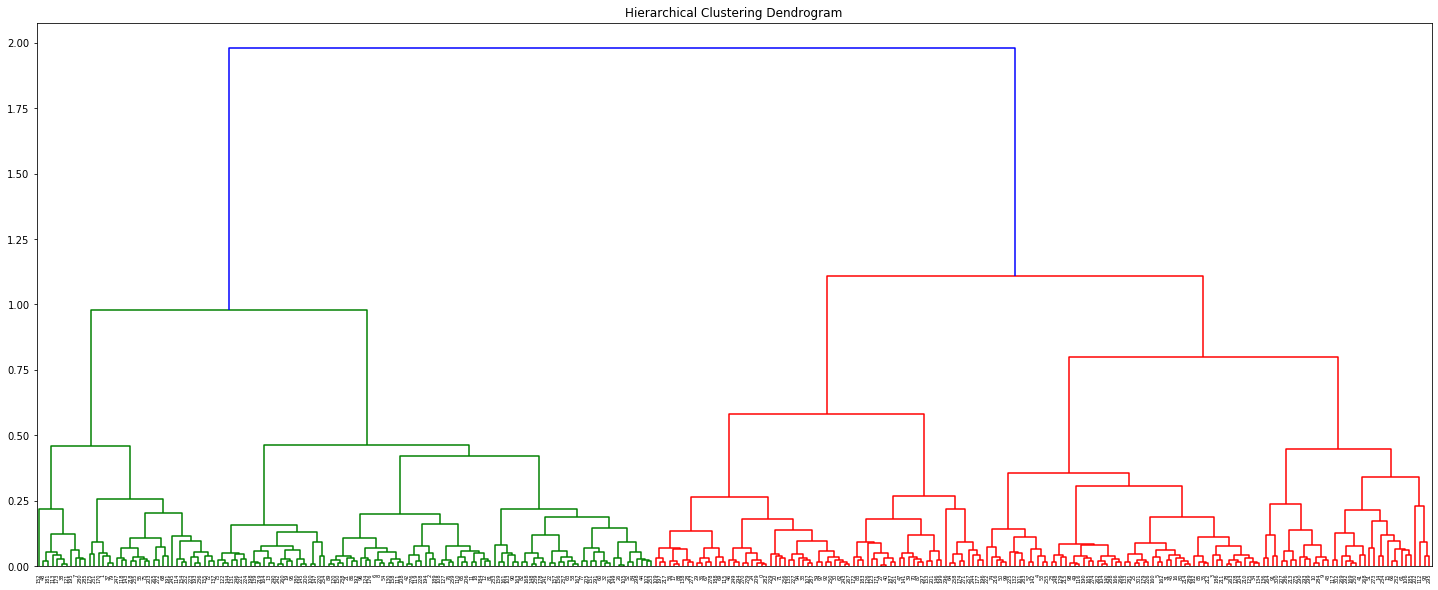

In [45]:
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage(X, 'ward'))
plt.show()

### DBSCAN

In [46]:
X = np.array([
    [1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]
])

In [48]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [49]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

### Spectral Clustering

In [50]:
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]]) #Adjacency Matrix

In [52]:
D = np.diag(A.sum(axis=1)) #Degree matrix

In [53]:
D

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])

In [54]:
L = D-A #Laplacian matrix

In [55]:
vals, vecs = np.linalg.eig(L)

In [56]:
#sort based on the eigenvalues (고유값)
vecs = vecs[:, np.argsort(vals)]
vals = vals[np.argsort(vals)]

In [57]:
kmeans = KMeans(n_clusters = 3)

In [58]:
kmeans.fit(vecs[:, 1:4])
kmeans.labels_

array([0, 1, 1, 0, 0, 2, 2, 2, 0, 0], dtype=int32)

In [60]:
clustering = SpectralClustering(n_clusters = 2, random_state = 0).fit(A)
clustering.labels_

/usr/local/lib/python3.7/site-packages/sklearn/cluster/spectral.py:462: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int32)